In [95]:
fields = ['au:' , 'ti:' , 'abs:' , 'cat:']

lines = ['authors=' , 'title=' , 'abstract=', 'categories=SP' , 12313 , 'nonsense' ]

In [36]:
[(k,v) for (k,v) in zip(fields, lines[:4])]

[('au:', 'authors=Steve Zelditch,Colin de Verdiere'),
 ('ti:', 'title='),
 ('abs:', 'abstract='),
 ('cat:', 'categories=SP,AP')]

In [96]:

q = []

for (k,v) in zip(fields,lines[:4]):
    if v.endswith('='):
        continue
    elif k == 'au:':
        names = v.split('=')[1].split(',')
        names_formatted = ['"{}"'.format(name) for name in names ]
        q.append('(' + k + ' OR '.join(names_formatted) + ')')
    elif k == 'cat:':
        cats = v.split('=')[1].split(',')
        cats_as_string = k + ' OR '.join(['math.{}'.format(cat) for cat in cats])
        q.append('(' + cats_as_string + ')')
    else:
        q.append('(' + k + '"' + v.split('=')[1] + '"' + ')')
        
string = ' AND '.join(q)
    
print(string)





(cat:math.SP)


In [92]:
import requests

r = requests.get('http://export.arxiv.org/api/query' , params = {})

print(r.url)


http://export.arxiv.org/api/query


In [17]:
class Paper:
    '''Stores the metadata of a paper returned by querying the ArXiv.'''
    
    def __init__(self, tag):
        '''
        Args:
            tag: The bs4 tag of an 'entry' in an ArXiv query result bs4 object.

        Attributes:
            title: Title of the paper
            abstract: Abstract of the paper
            authors: A string containing the author names separated by commas.
            published: date the paper was uploaded to the ArXiv in standard isoformat time. The timezone is GMT +0.
        '''

        self.title = tag.find('title').text
        self.abstract = tag.find('summary').text
        self.published = tag.find('published').text.replace('Z','')
        self.id = tag.find('id').text
        self.updated = tag.find('updated').text.replace('Z','')
        self.category = None
        self.authors = ','.join([author.find('name').text for author in tag.find_all('author')])



In [2]:
class QueryResults(list):
    pass

In [22]:
import requests
from bs4 import BeautifulSoup

query_params = { 'search_query' : 'au:"Steve Zelditch"' , 'max_results' : 100 }

source = requests.get('http://export.arxiv.org/api/query', params = query_params)
soup = BeautifulSoup(source.content, 'xml')

query_results = QueryResults(Paper(entry) for entry in soup.find_all('entry'))

for paper in query_results:
    print(paper.authors)


Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Steve Zelditch
Bernard Shiffman,Steve Zelditch
Bernard Shiffman,Steve Zelditch
Andrew Hassell,Steve Zelditch
Bernard Shiffman,Steve Zelditch
Bernard Shiffman,Steve Zelditch
Andrew Hassell,Steve Zelditch
Bernard Shiffman,Steve Zelditch
Tatsuya Tate,Steve Zelditch
Bernard Shiffman,Steve Zelditch
Nalini Anantharaman,Steve Zelditch
Bernard Shiffman,Steve Zelditch
Jian Song,Steve Zelditch
Steve Zelditch,Maciej Zworski
John Toth,Ste

In [64]:
from datetime import datetime, tzinfo, timedelta

last_year = QueryResults(paper for paper in query_results if (datetime.fromisoformat(paper.published) > datetime.now() + timedelta(weeks=-52)) and (datetime.now() + timedelta(weeks=-30) > datetime.fromisoformat(paper.published)) )

for paper in last_year:
    print(paper.title , 'submitted at: {}'.format(paper.published))
    
type(last_year)

Restriction of eigenfunctions to totally geodesic submanifolds submitted at: 2022-06-11T17:36:40
$2$-nodal domain theorems for higher dimensional circle bundles submitted at: 2022-07-27T12:50:35
Scaling asymptotics of spectral Wigner functions submitted at: 2022-07-27T15:10:54


__main__.QueryResults

In [61]:
import pandas as pd

df = pd.DataFrame(columns=['id','title','authors','abstract','published','updated'])

print(df)

cols = ['id','title','authors','abstract','published','updated']

pd.Series(index=['id','title','authors','abstract','published','updated'] , data=[last_year[0].id , last_year[0].title , last_year[0].authors , last_year[0].abstract , last_year[0].published , last_year[0].updated ])

Empty DataFrame
Columns: [id, title, authors, abstract, published, updated]
Index: []


id                           http://arxiv.org/abs/2206.05574v1
title        Restriction of eigenfunctions to totally geode...
authors                                         Steve Zelditch
abstract       This article is about two types of restricti...
published                                  2022-06-11T17:36:40
updated                                    2022-06-11T17:36:40
dtype: object

In [74]:

df = pd.DataFrame(columns=['id','title','authors','abstract','published','updated'])

for paper in last_year:
    row = pd.Series(
                
    index=['id','title','authors','abstract','published','updated'],
    data=[paper.id , paper.title , paper.authors , paper.abstract , paper.published , paper.updated]
                
    )
    
    df = pd.concat([df , row.to_frame().transpose()] , axis=0)
    


,id,title,authors,abstract,published,updated
0,http://arxiv.org/abs/2206.05574v1,Restriction of eigenfunctions to totally geode...,Steve Zelditch,This article is about two types of restricti...,2022-06-11T17:36:40,2022-06-11T17:36:40
1,http://arxiv.org/abs/2207.13498v1,$2$-nodal domain theorems for higher dimension...,"Junehyuk Jung,Steve Zelditch",We prove that the real parts of equivariant ...,2022-07-27T12:50:35,2022-07-27T12:50:35
2,http://arxiv.org/abs/2207.13571v2,Scaling asymptotics of spectral Wigner functions,"Boris Hanin,Steve Zelditch",We prove that smooth Wigner-Weyl spectral su...,2022-07-27T15:10:54,2022-07-28T05:42:37


In [26]:
import requests 
from bs4 import BeautifulSoup

def get_results(params):
    '''
    Sets the results attribute to the QueryResults list containing
    each paper returned by querying the ArXiv with self.query_params.   
    '''    
    try:
        if not params:
            raise Exception()
        else:
            source = requests.get('http://export.arxiv.org/api/query', params = params)
            soup = BeautifulSoup(source.content, 'xml')
            results = [entry for entry in soup.find_all(entries)]
    except:
        pass

In [32]:
params = None

get_results(params)

print(results)

None


In [42]:
with open('test.txt', 'r') as file:
    line = file.readline()

print(line)

line

Here are some lines



'Here are some lines\n'

In [46]:
import numpy as np

array = np.array([1,2,3,4])

print(array , array.shape)

array = np.expand_dims(array , -1)

print(array, array.shape)

[1 2 3 4] (4,)
[[1]
 [2]
 [3]
 [4]] (4, 1)


In [49]:
z = np.array([1,2,3,4])

z.shape

z.ndim

z_reshaped = np.expand_dims(z , axis=-1)

print(z_reshaped.shape , z_reshaped.ndim)

(4, 1) 2


In [30]:
import numpy as np

X = np.array([[1,2] , [0,2] , [5,0]])

y = np.array([1,1,0])

(X @ np.array([0,0])).shape


(3,)

In [100]:
import matplotlib.pyplot as plt
import numpy as np

def plot(x, y, include_decision=False, theta=np.zeros(3), save_path=None, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    if include_decision:
        margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
        margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
        x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
        
        if theta[2] == 0:
            raise ValueError('Bad theta')
        x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
        plt.plot(x1, x2, c='red', linewidth=2)
        plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
        plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)

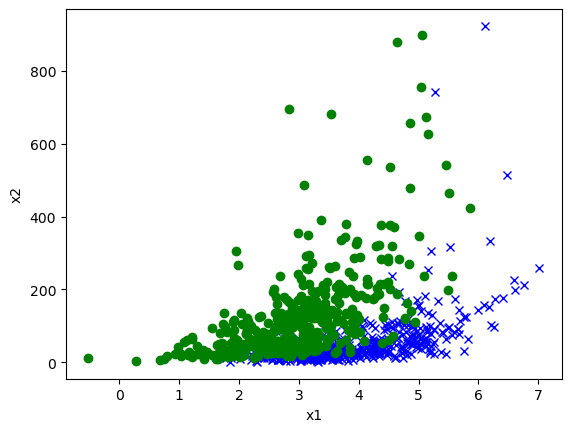

In [37]:
import util
import linear_model
from p01b_logreg import LogisticRegression

x_train , y_train = util.load_dataset('../data/ds1_train.csv')

util.plot(x_train,y_train)



In [41]:
import util
import linear_model
from p01b_logreg import LogisticRegression

x_train , y_train = util.load_dataset('../data/ds1_train.csv' , add_intercept=True)

logreg = LogisticRegression()
theta = np.zeros(3)

help(logreg)

Help on LogisticRegression in module p01b_logreg object:

class LogisticRegression(linear_model.LinearModel)
 |  LogisticRegression(step_size=0.2, max_iter=100, eps=1e-05, theta_0=None, verbose=True)
 |  
 |  Logistic regression with Newton's Method as the solver.
 |  
 |  Example usage:
 |      > clf = LogisticRegression()
 |      > clf.fit(x_train, y_train)
 |      > clf.predict(x_eval)
 |  
 |  Method resolution order:
 |      LogisticRegression
 |      linear_model.LinearModel
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, x, y)
 |      Run Newton's Method to minimize J(theta) for logistic regression.
 |      
 |      Args:
 |          x: Training example inputs. Shape (m, n).
 |          y: Training example labels. Shape (m,).
 |  
 |  predict(self, x)
 |      Make a prediction given new inputs x.
 |      
 |      Args:
 |          x: Inputs of shape (m, n).
 |      
 |      Returns:
 |          Outputs of shape (m,).
 |  
 |  ---------------------------

In [5]:
import util
import linear_model
from p01b_logreg import LogisticRegression
import numpy as np

model = LogisticRegression()

x_train , y_train = util.load_dataset('../data/ds1_train.csv' , add_intercept=True)

model = LogisticRegression()
model.fit(x_train,y_train)

theta = model.theta

looped 6 times
1.3574728704170058e-07


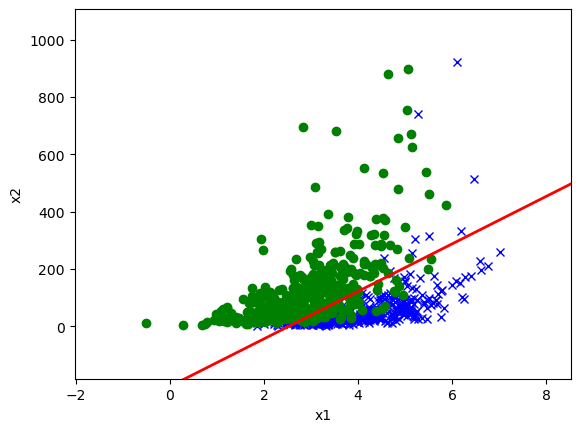

In [6]:
util.plot(x_train,y_train, include_decision=True, theta=theta)

In [23]:
import numpy as np

A = np.array([[0,0,1]])

def mul(z):
    return A @ z
## This function takes in a vector in R3 and returns its third component.

B = np.array([[1,2,4],[2,6,8],[-1,0,29]])


print(B)

out = np.apply_along_axis(func1d=mul, arr=B, axis=1)

out = out.reshape((1,3))
print(out)
print(B - out)

d = np.diag(B)

np.diag(d)

[[ 1  2  4]
 [ 2  6  8]
 [-1  0 29]]
[[ 4  8 29]]
[[ -3  -6 -25]
 [ -2  -2 -21]
 [ -5  -8   0]]


array([[ 1,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 29]])

In [26]:
## Testing out the applying along rows functionality to get a 3 dim output.

def outer(z):
    return np.multiply.outer(z,z)

np.apply_along_axis(func1d=outer,arr=B,axis=1)

array([[[  1,   2,   4],
        [  2,   4,   8],
        [  4,   8,  16]],

       [[  4,  12,  16],
        [ 12,  36,  48],
        [ 16,  48,  64]],

       [[  1,   0, -29],
        [  0,   0,   0],
        [-29,   0, 841]]])

In [36]:
W = np.ones((3,3,3))

x = np.array([[1,2],[3,4],[5,6]])

# compare

(x.T @ W @ x).shape

y = np.array([1,2,3])

(W @ y)[0:]



(3, 3)

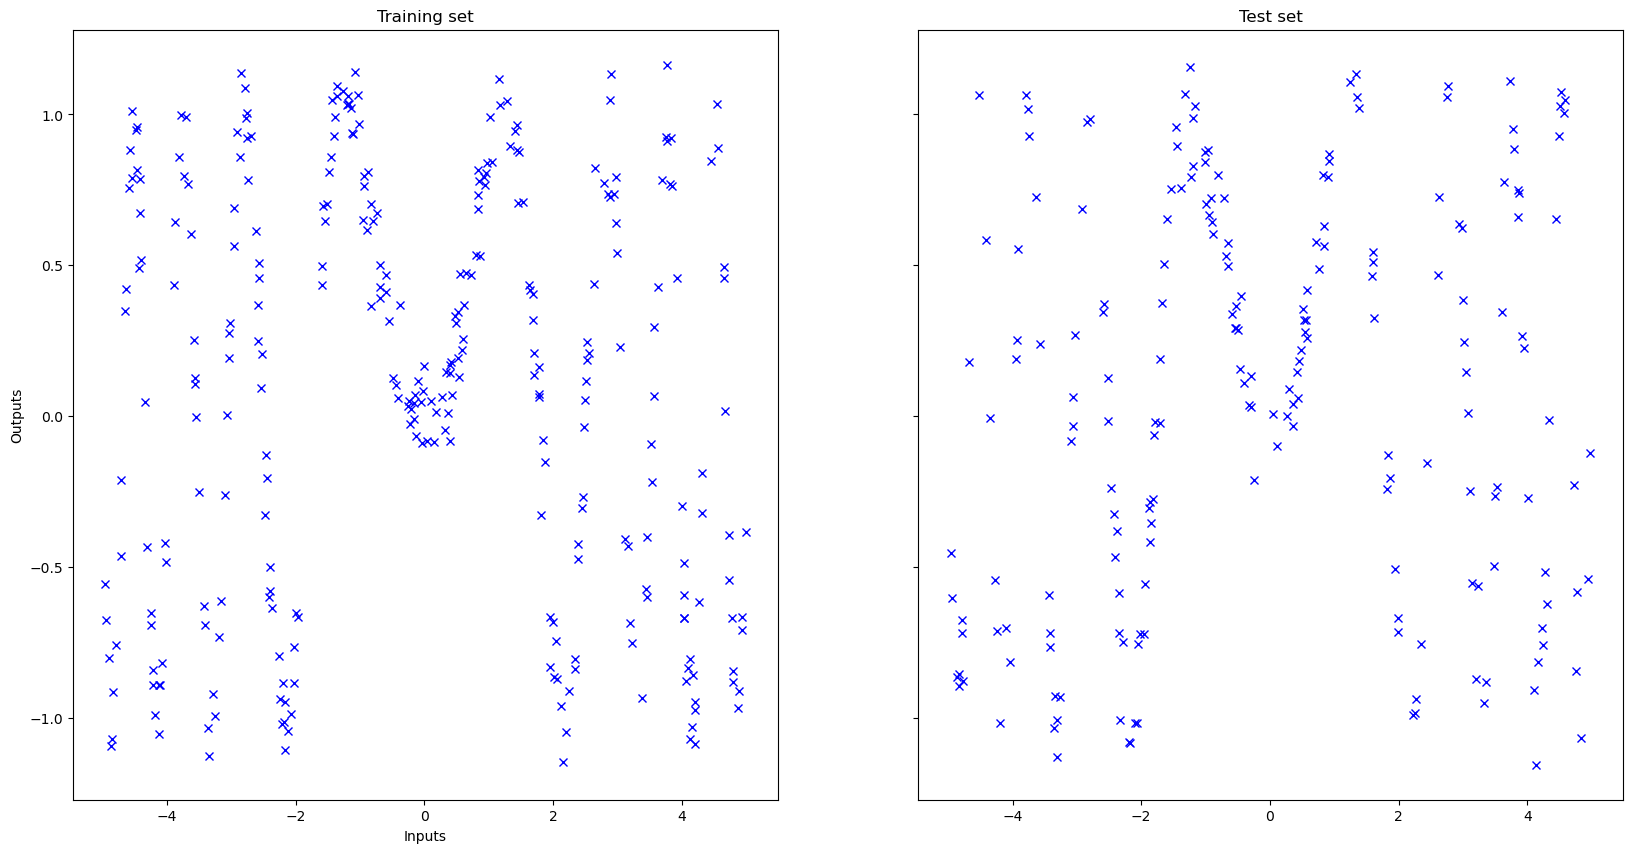

In [21]:
import util
from p05b_lwr import LocallyWeightedLinearRegression
import matplotlib.pyplot as plt


x_train , y_train = util.load_dataset('../data/ds5_train.csv', add_intercept=True)
x_test , y_test = util.load_dataset('../data/ds5_test.csv', add_intercept=True)
x_valid , y_valid = util.load_dataset('../data/ds5_valid.csv',add_intercept=True)

model = LocallyWeightedLinearRegression(tau=0.5)
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
train_preds = model.predict(x_train)

x , _ = util.load_dataset('../data/ds5_test.csv')

fig_train , ax_train = plt.subplots()

ax_train.plot(x_train[:,-1] , y_train , 'bx', linewidth=2)
ax_train.set_title('Training set')
ax_train.set_ylabel('Outputs')
ax_train.set_xlabel('Inputs')

ax2.plot(x_test[:,-1] , y_test , 'bx', linewidth=2)
ax2.set_title('Test set')

plt.show()

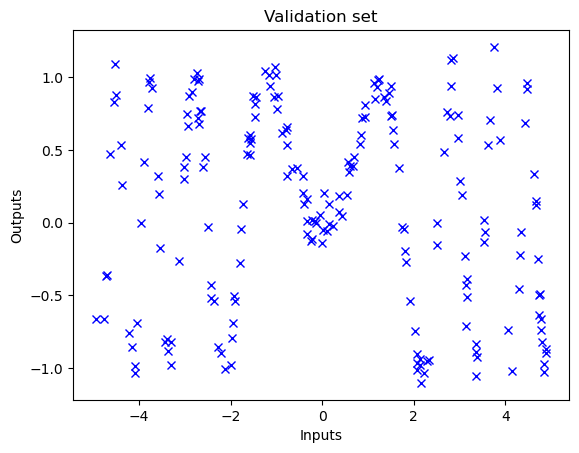

In [20]:
## Plot the validation set as well:

fig_valid , ax3 = plt.subplots()

ax3.set_title('Validation set')
ax3.set_xlabel('Inputs')
ax3.set_ylabel('Outputs')

ax3.plot(x_valid[:,-1] , y_valid, 'bx', linewidth=2)
plt.show()